# Simple model of infection

Each individual infects $c$ new people each day.

$I_{n+1} = I_n + (c I_n) = I_n(1 + c)$

So

$I_{n+1} = \lambda I_n$,  where $\lambda := 1 + c$ -- **growth rate**

and $I_0 = 1$

In [3]:
I0 = 1

1

In [4]:
I_0 = 1

1

In [6]:
I₀ = 1   # \_0 <TAB>

1

In [7]:
c = 0.01  # average no. of people that each individual infects on each day

0.01

In [8]:
λ = 1 + c  # \lambda <TAB>

1.01

In [10]:
λ = 1 + c; 

`;` suppresses output

In [11]:
I_1 = λ * I_0

1.01

In [12]:
I_2 = λ * I_1

1.0201

In [13]:
I_3 = λ * I_2

1.030301

## Arrays

In [14]:
T = 10  # final time 

I = zeros(T)  

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [15]:
I

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [16]:
I[1]

0.0

In [17]:
I[1:2]

2-element Array{Float64,1}:
 0.0
 0.0

In [19]:
I = zeros(Int64, T)

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

In [20]:
I = zeros(T)

10-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [21]:
I[1] = I_0   # Could use OffsetArrays.jl -- enables arbitrary indexing

1

In [25]:
for n in 1:T-1
    I[n+1] = λ * I[n]
    @show n, I[n]
end

# for loops do not return anything so running a for loop does not output

(n, I[n]) = (1, 1.0)
(n, I[n]) = (2, 1.01)
(n, I[n]) = (3, 1.0201)
(n, I[n]) = (4, 1.030301)
(n, I[n]) = (5, 1.04060401)
(n, I[n]) = (6, 1.0510100501)
(n, I[n]) = (7, 1.061520150601)
(n, I[n]) = (8, 1.0721353521070098)
(n, I[n]) = (9, 1.08285670562808)


In [26]:
I

10-element Array{Float64,1}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

In [27]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


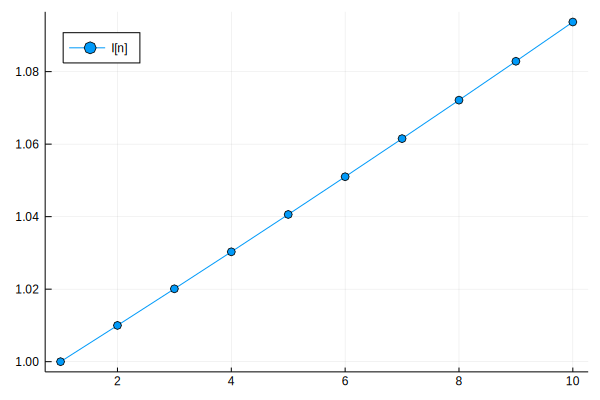

In [29]:
plot(I, m=:o, label="I[n]", legend=:topleft)

In [30]:
T = 20

I = zeros(I)
I[1] = I_0

for n in 1:T-1
    I[n+1] = λ * I[n]
    @show n, I[n]
end

plot(I)

(n, I[n]) = (1, 1.0)
(n, I[n]) = (2, 1.01)
(n, I[n]) = (3, 1.0201)
(n, I[n]) = (4, 1.030301)
(n, I[n]) = (5, 1.04060401)
(n, I[n]) = (6, 1.0510100501)
(n, I[n]) = (7, 1.061520150601)
(n, I[n]) = (8, 1.0721353521070098)
(n, I[n]) = (9, 1.08285670562808)


BoundsError: BoundsError: attempt to access 10-element Array{Float64,1} at index [11]

## Functions

In [31]:
function run_infection(T=20)  # default

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = λ * I[n]
    end

    return I
end

run_infection (generic function with 2 methods)

In [32]:
methods(run_infection)

# 2 methods for generic function "run_infection":
[1] run_infection() in Main at In[31]:3
[2] run_infection(T) in Main at In[31]:3

In [33]:
run_infection(10)

10-element Array{Float64,1}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

In [34]:
I_result = run_infection(10);

In [35]:
I_result

10-element Array{Float64,1}:
 1.0
 1.01
 1.0201
 1.030301
 1.04060401
 1.0510100501
 1.061520150601
 1.0721353521070098
 1.08285670562808
 1.0936852726843609

**Always separate data generation from plotting!**

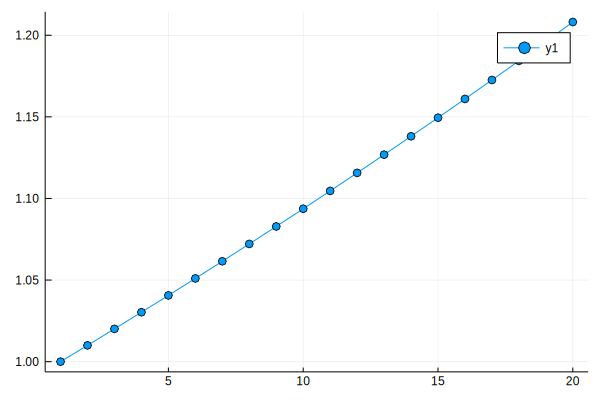

In [38]:
I_result = run_infection(20)

plot(I_result, m=:o)

In [39]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8708396207414253126\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-9399351997869588815\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-8708396207414253126\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [44]:
end_T = 1000
@manipulate for T in slider(1:end_T, value=1)
    I_result = run_infection(T)

    plot(I_result, m=:o)
    
    xlims!(0, end_T)
    ylims!(0, 10)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 1000,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/dpsanders/.julia/packages/Knockout/IP1uR/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/all.js"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/InteractBase/9mFwe/src/../assets/style.css"), Asset("css", nothing, "/Users/dpsanders/.julia/packages/Interact/cdOnS/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000012f2a8250, Task (runnable) @0x000000012f2a8250), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\

## Exponential growth

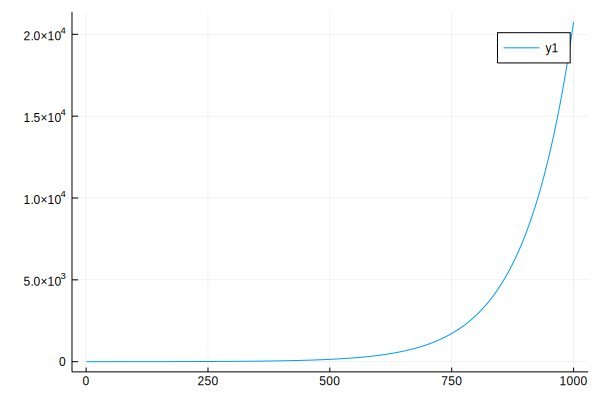

In [46]:
plot(run_infection(1000))

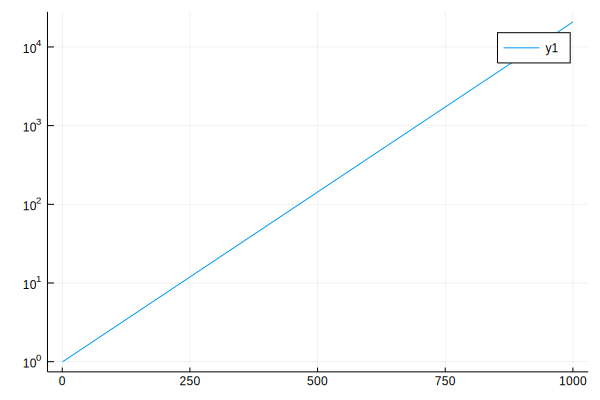

In [47]:
plot(run_infection(1000), yscale=:log10)

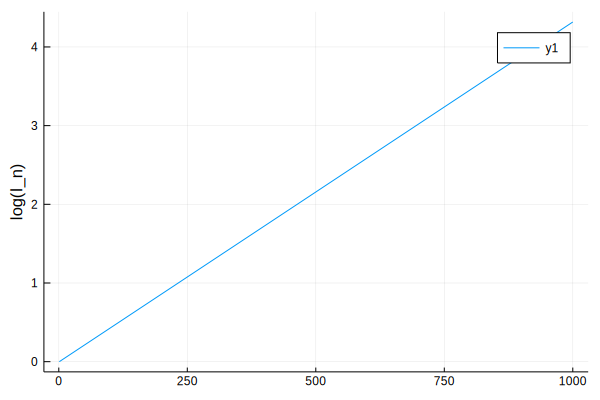

In [50]:
I_result = run_infection(1000)

plot(log10.(I_result))   # log of each element in I_result
ylabel!("log(I_n)")

$\log(I_n) = a n + b$

Take exponentials of both sides:

$I_n = \exp(an + b) = C e^{a n}$

Solve $I_{n+1} = \lambda I_n$:

$I_n = \lambda^n I_0$

$\log(\lambda^n) = n \log(\lambda)$

## Logistic growth

Exp growth is unrealistic: Assumes that there are always more people to infect -- wrong (finite population).

$I_{n+1} = I_n + c I_n$

Each individual will be in contact with a fraction $\alpha$ of the population. At each contact there will a probability $p$ that you infect each person.

Number of contacts = $\alpha N$

So $c = p \alpha N$

Original model:

$I_{n+1} = I_n + (p \alpha N) I_n$  -- good approximation when almost everybody still susceptible

New model:

Can only infect uninfected people!

$I_{n+1} = I_n + (p \alpha S_n) I_n$

$I_{n+1} = I_n + [p \alpha (N - I_n)] I_n = f(I_n)$

$I_{n+1} = I_n + \beta(I_n, S_n) I_n = f(I_n)$

In [56]:
p = 0.02
α = 0.01
N = 1000

β(I, S) = p * α * S

function run_infection(T=20)  # default

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        I[n+1] = I[n] + β(I[n], N - I[n]) * I[n]
    end

    return I
end

run_infection (generic function with 2 methods)

In [57]:
I = run_infection(20)

20-element Array{Float64,1}:
  1.0
  1.1998
  1.439472095992
  1.7269520992073721
  2.071746046338255
  2.4852368292698026
  2.9810489147042514
  3.57548136711873
  4.288020827141153
  5.141947568046585
  6.165049156697394
  7.390457421815974
  8.857625133998434
 10.613458656195233
 12.713621286504926
 15.224018310562577
 18.222467825971023
 21.80054972443152
 26.065606875660343
 31.14284507843312

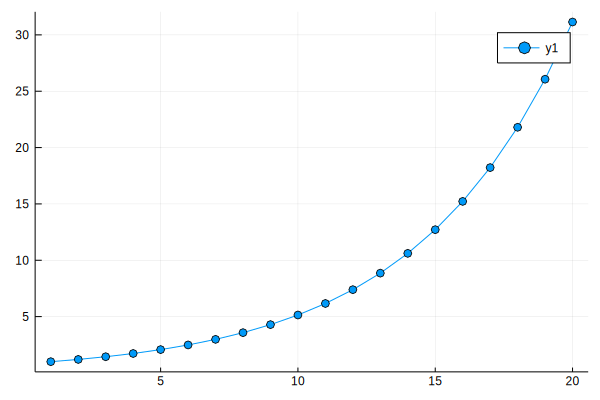

In [58]:
plot(I, m=:o)

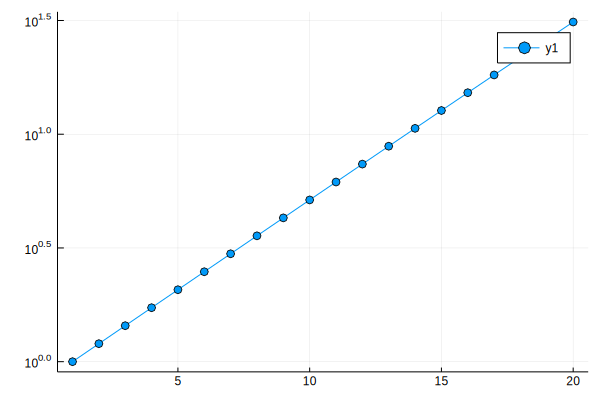

In [59]:
plot(I, m=:o, yscale=:log10)

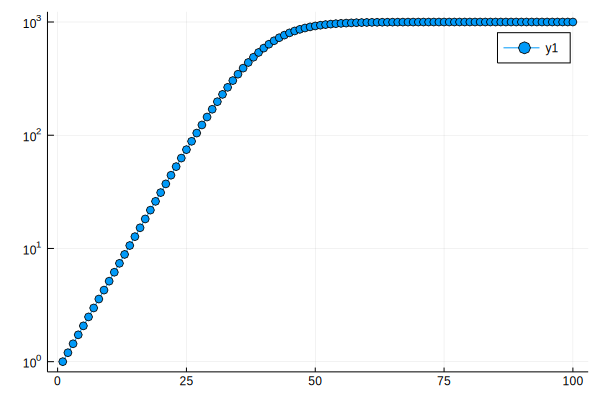

In [61]:
I = run_infection(100)
plot(I, m=:o, yscale=:log10)

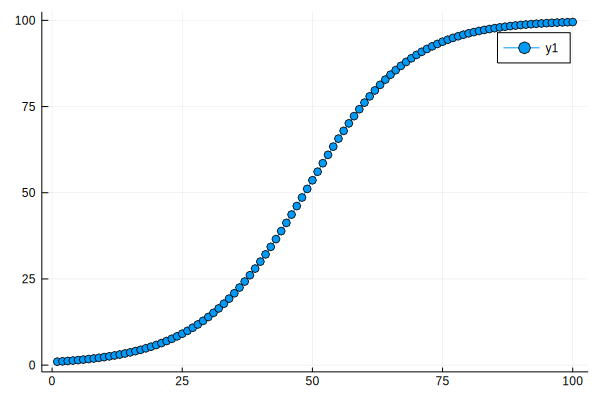

In [64]:
p = 0.01
α = 0.1
N = 100

I = run_infection(100)
plot(I, m=:o)

**Sigmoid** shape -- S-shaped

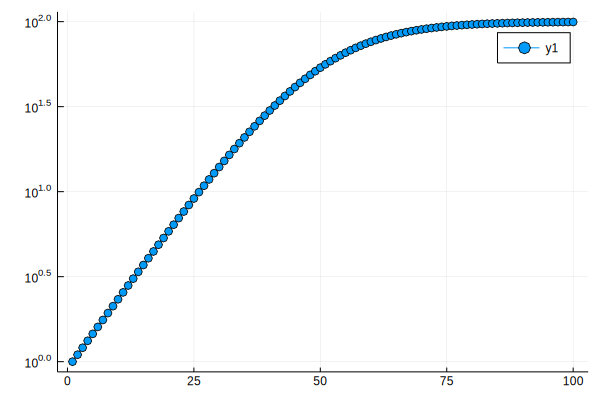

In [65]:
plot(I, m=:o, yscale=:log10)

"Logistic-type growth"

$I_{n+1} = \lambda I_n$

## More realism: Heterogeneity of individuals or groups

Idea: Instead of modelling population globally, model each individual

"Patch model": Local patches where population is **well mixed**

Network model: Links between nodes

Exponential growth:

$I_{n+1} = \lambda_n I_n$  -- growth rate changes in time

In [66]:
rand()

0.2767437763441829

In [67]:
rand()

0.7089008345855983

In [68]:
rand()

0.3789568897206148

www.random.org

In [69]:
randn()

-0.33523291258515997

In [71]:
p = 0.02
α = 0.01
N = 1000



function run_infection(c_average=1.1, T=20)  # default

    I = zeros(T)
    I[1] = I_0

    for n in 1:T-1
        c = c_average + 0.1*randn()
        I[n+1] = I[n] + c * I[n]
    end

    return I
end

run_infection (generic function with 3 methods)

In [73]:
c_average = 1.1

cs = [c_average + 0.1*randn() for i in 1:100]

100-element Array{Float64,1}:
 1.1794683814069813
 1.0510617699472489
 1.0799811965453343
 1.3160413008055867
 1.0655215426073297
 1.014913328568307
 1.2142141455660913
 0.9952511944053644
 1.1118228511102424
 1.2274911767386665
 1.097194489799497
 1.156157408743076
 1.0138054185809025
 ⋮
 1.252209922391299
 1.0305288124096037
 1.1816089517166688
 0.9848866930013738
 1.175520029029598
 1.1695318311722314
 1.1237453859981914
 1.1925550201637143
 0.9331362892813453
 1.0848564135882912
 1.184898469695791
 1.0756350756110384

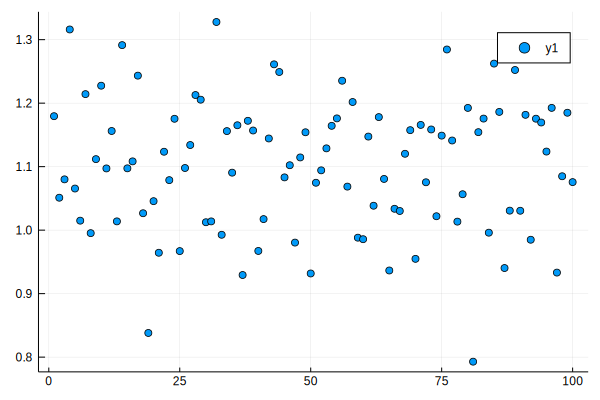

In [74]:
scatter(cs)